### 19. 主成分分析(PCA)

#### <font color = blue>**1.** </font>Mall_Customersのデータより

In [ ]:
# 加工したデータ: https://raw.githubusercontent.com/jiai-edu/teaching_ep_elementary-phython/master/datasets/PCA_demoData.csv

In [ ]:
# numpy を import

import numpy as np

In [ ]:
# numpy配列（ndarray形式）として読み込む
# numpy.loadtxt() で .txt も .csv も読み込める
# カンマ区切りで配列要素に格納してほしいので、引数に delimiter="," と指定する

data = np.loadtxt('https://raw.githubusercontent.com/jiai-edu/teaching_ep_elementary-phython/master/datasets/PCA_demoData.csv', delimiter=",") 

In [ ]:
# ndarray.shape で配列の構造を確認

data.shape

(200, 5)

In [ ]:
# 比較のため元データも読み込んでみる
# pandas を import

import pandas as pd

In [ ]:
# pandas.DataFrame 形式で元データを読み込む
# 16. 相関分析 で扱った元データの保存場所: https://raw.githubusercontent.com/jiai-tus/FirstTerm/main/20201201/dataset/Mall_Customers.csv

df = pd.read_csv("https://raw.githubusercontent.com/jiai-tus/FirstTerm/main/20201201/dataset/Mall_Customers.csv")

In [ ]:
# 先頭１０行を表示

df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
# 加工したデータも同じく先頭１０行を確認
# pandas.DataFrame ではないので、 head() メソッドなどは存在しない

for i in range(10):
  print(data[i])

[ 1.  1. 19. 15. 39.]
[ 2.  1. 21. 15. 81.]
[ 3.  0. 20. 16.  6.]
[ 4.  0. 23. 16. 77.]
[ 5.  0. 31. 17. 40.]
[ 6.  0. 22. 17. 76.]
[ 7.  0. 35. 18.  6.]
[ 8.  0. 23. 18. 94.]
[ 9.  1. 64. 19.  3.]
[10.  0. 30. 19. 72.]


In [ ]:
# 標準化や規格化なしでとりあえず主成分分析(PCA)してみる
# ライブラリのインポート

from sklearn.decomposition import PCA

In [ ]:
# 2次元に削減（上位2変数を取り出す）場合はこのように記述

pca = PCA(n_components=2)
data_2D = pca.fit_transform(data)

In [ ]:
# 配列構造を確認

data_2D.shape

(200, 2)

In [ ]:
# 先頭１０行を確認

for i in range(10):
  print(data_2D[i])

[-109.38394055    5.47845404]
[-108.202857    -34.93176488]
[-107.37629206   37.84087172]
[-106.00780674  -30.56269646]
[-104.98032255    7.29674715]
[-103.77472296  -29.80123813]
[-102.99648078   41.32276991]
[-101.42674453  -47.07130349]
[-100.95219122   50.92373825]
[-99.38052226 -24.03460769]


In [ ]:
# 5次元（5変数）のデータなので、1〜4次元の4通りのPCA結果が考えられる
# 4通り全て試してみる

XD = [0] * 4
for i in range(4):
  pca = PCA(n_components=(i+1))
  XD[i] = pca.fit_transform(data)
  print("XD[{}]: ".format(i), XD[i].shape)

XD[0]:  (200, 1)
XD[1]:  (200, 2)
XD[2]:  (200, 3)
XD[3]:  (200, 4)


In [ ]:
# それぞれ先頭５行を確認してみる

for i in range(4):
  for k in range(5):
    print("XD[{}][{}]: ".format(i, k), XD[i][k])
    if i != 3 and k == 4:
      print("\n")

XD[0][0]:  [-109.38394055]
XD[0][1]:  [-108.202857]
XD[0][2]:  [-107.37629206]
XD[0][3]:  [-106.00780674]
XD[0][4]:  [-104.98032255]


XD[1][0]:  [-109.38394055    5.47845404]
XD[1][1]:  [-108.202857    -34.93176488]
XD[1][2]:  [-107.37629206   37.84087172]
XD[1][3]:  [-106.00780674  -30.56269646]
XD[1][4]:  [-104.98032255    7.29674715]


XD[2][0]:  [-109.38394055    5.47845404  -22.36804518]
XD[2][1]:  [-108.202857    -34.93176488  -10.77794564]
XD[2][2]:  [-107.37629206   37.84087172  -28.96855639]
XD[2][3]:  [-106.00780674  -30.56269646   -9.74100115]
XD[2][4]:  [-104.98032255    7.29674715  -10.44185064]


XD[3][0]:  [-109.38394055    5.47845404  -22.36804518   -0.38280387]
XD[3][1]:  [-108.202857    -34.93176488  -10.77794564   -0.91935923]
XD[3][2]:  [-107.37629206   37.84087172  -28.96855639   -0.2588597 ]
XD[3][3]:  [-106.00780674  -30.56269646   -9.74100115   -0.87319024]
XD[3][4]:  [-104.98032255    7.29674715  -10.44185064   -0.53615133]


In [ ]:
# matplotlib.pyplot で可視化してみましょう
# ライブラリのインポート

import matplotlib.pyplot as plt

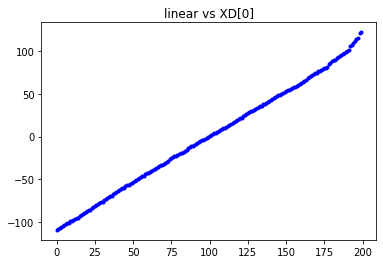

In [ ]:
# 1次元に削減した場合

plt.plot(range(XD[0].shape[0]), XD[0], 'b.')
plt.title("linear vs XD[0]")
plt.show()

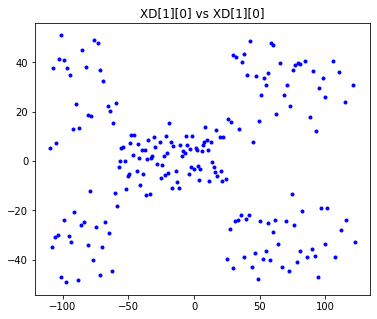

In [ ]:
# 2次元に削減した場合

plt.figure(figsize=(6, 5))
plt.plot(XD[1][:, 0], XD[1][:, 1], 'b.')
plt.title("XD[1][0] vs XD[1][0]")
plt.show()

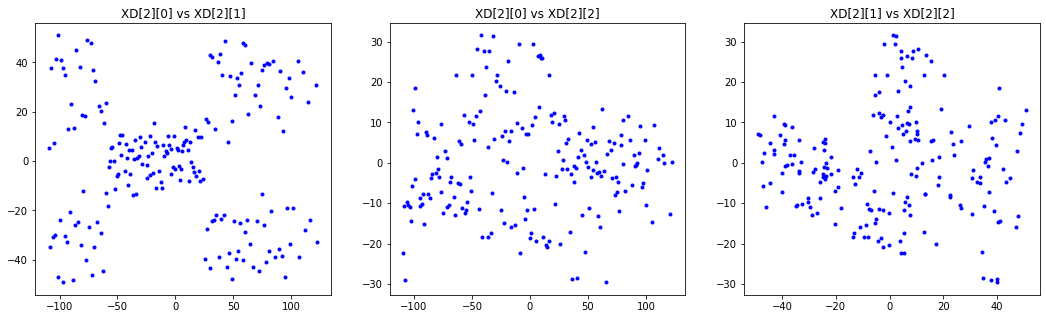

In [ ]:
# 3次元に削減した場合

plt.figure(figsize=(18, 5))

n = 1
for i in range(3):
  for k in range(i+1, 3):
    plt.subplot(1,3,n)
    plt.plot(XD[2][:, i], XD[2][:, k], 'b.')
    plt.title("XD[2][{}] vs XD[2][{}]".format(i, k))
    n += 1

#plt.subplots_adjust(hspace=0.25)
plt.show()

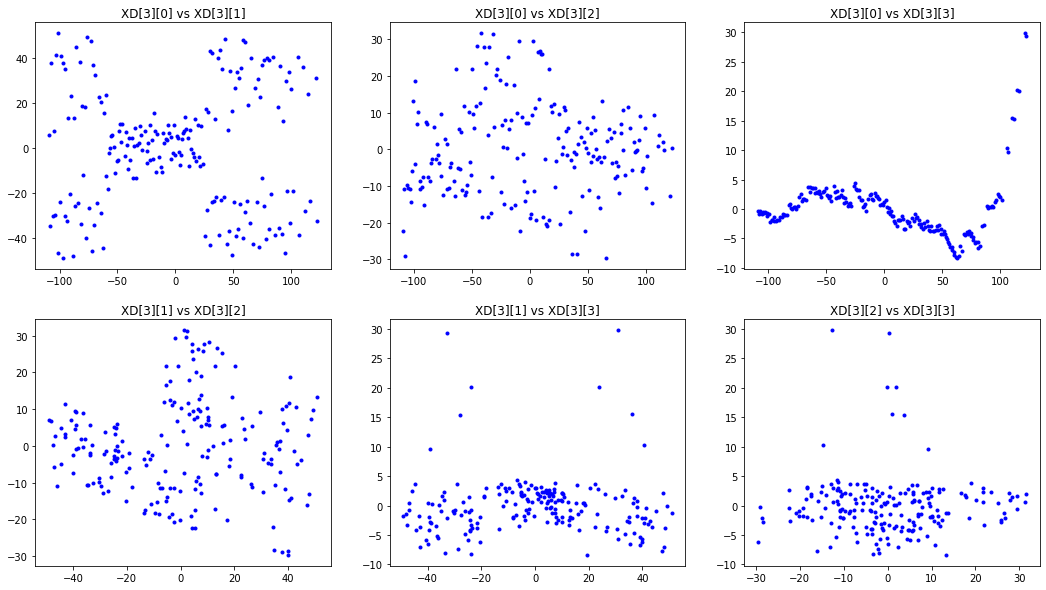

In [ ]:
# 4次元に削減した場合

plt.figure(figsize=(18, 10))

n = 1
for i in range(4):
  for k in range(i+1, 4):
    plt.subplot(2,3,n)
    plt.plot(XD[3][:, i], XD[3][:, k], 'b.')
    plt.title("XD[3][{}] vs XD[3][{}]".format(i, k))
    n += 1

#plt.subplots_adjust(hspace=0.25)
plt.show()

#### <font color=red>task : </font> 各変数を標準化・規格化してから主成分分析を行ってみる
5つの変数それぞれで標準化/規格化の有無を全て試すのも1つの手だが、元々のデータの意味・人間的解釈から、変数ごとにどういう前処理をすべきか、すべきでないか考察したうえで、実際に行ってみて比較してほしい

### 20. k平均法(k-means)

#### <font color = blue>**1.** </font>ライブラリについて

In [ ]:
'''
使用するメソッドの情報

sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300,
                       tol=0.0001,precompute_distances='auto', verbose=0,
                       random_state=None, copy_x=True, n_jobs=1)

引数 | 説明
-----------:|:------------
n_clusters | クラスタ数(デフォルト値:8) 
max_iter | 繰り返し回数の最大値(デフォルト値:300)
n_init | 初期値選択において、異なる乱数のシードで初期の重心を選ぶ処理の実行回数
 | (デフォルト値:10)
init | 初期化の方法。’k-means++”, ‘random’ もしくは ndarray を指定
 | (デフォルト値: ‘k-means++’)
tol | 収束判定に用いる許容可能誤差(デフォルト値:0.0001)
precompute_distances | 距離(データのばらつき具合) を事前に計算するか。
 | ‘auto’, True, False から指定(デフォルト値:‘auto’)
verbose | 1 を指定すると、詳細な分析結果を表示(デフォルト値:0)
random_state | 乱数のシードを固定する場合に指定
 | 数値もしくは integer or numpy.RandomState で指定(デフォルト値:None)
copy_x | 距離を事前に計算する場合、メモリ内でデータを複製してから実行するかどうか
 | (デフォルト値:True)
n_jobsv | 初期化を並列処理する場合の多重度
 | -1 を指定するとすべての CPU を使用(デフォルト値:1)

クラスメソッド | 説明
-----------:|:------------
fit(X[, y]) | クラスタリングの計算を実行する
fit_predict(X[, y]) | 各サンプルに対する、クラスタ番号を求める
fit_transform(X[, y]) | クラスタリングの計算を行い、X を分析に用いた距離空間に変換して返す
get_params([deep]) | 計算に用いたパラメータを返す
predict(X) | X のサンプルが属しているクラスタ番号を返す
set_params(**params) | パラメータを設定する
transform(X[, y]) | X を分析に用いた距離空間に変換して返す

#### <font color = blue>**2.** </font>19.1.で生成したデータをクラスタリング

In [ ]:
# ライブラリのインポート

from sklearn.cluster import KMeans

In [ ]:
# 色分けのリストを決めておく

color = ["red", "blue", "green", "orange", "aqua", "purple", "grey", "black"]

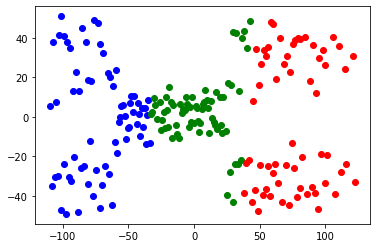

In [ ]:
# 3種類のグループ（クラスタ）に分ける（クラスタリングする）場合はこのような記述

km3 = KMeans(3)

km3.fit_transform(XD[1])

for i in range(XD[1].shape[0]):
  plt.scatter(XD[1][i,0], XD[1][i,1], c=color[int(km3.labels_[i])])

plt.show()

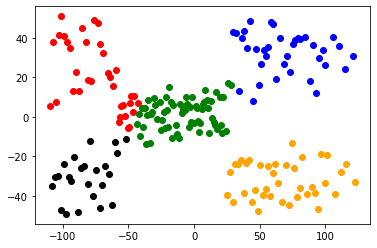

In [ ]:
# 5種類のグループ（クラスタ）に分ける（クラスタリングする）場合はこのような記述

km5 = KMeans(5)

km5.fit_transform(XD[1])

for i in range(XD[1].shape[0]):
  plt.scatter(XD[1][i,0], XD[1][i,1], c=color[int(km5.labels_[i])])

plt.show()

#### <font color=red>task : </font>3次元・4次元に削減したデータに対し、クラスタリング対象ペア・クラスター数をグリッドサーチ的に行ってみる

#### <font color = blue>**3.** </font>クラスター評価

In [ ]:
## 今回のpdfテキストではどういう結論にしたのか？？

エルボー法
https://www.medi-08-data-06.work/entry/kmeans

シルエット分析\
https://panda-clip.com/silhouette/ \
https://qiita.com/deaikei/items/11a10fde5bb47a2cf2c2

エントロピー評価
https://www.haya-programming.com/entry/2018/03/15/070029



積み上げ棒グラフ出力
https://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means

DBSCANと顔画像
https://qiita.com/mamika311/items/75c24f6892f85593f7e7


#### <font color = blue>**4.** </font>ランダム生成したデータでk平均法

##### <font color = green>**4.1.** </font>データ生成

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
'''
x = np.random.choice(["A","B","C"], 100)
x = pd.Series(x)
y = np.random.choice([0,1], 100)
y = pd.Series(y)
y.name = "testy"
'''

In [ ]:
# seed値固定
np.random.seed(seed=39)

# 生成するグループの数
k = 8

# グループ内のメンバー数
m = 300

# グループ毎の分散
d = m/(k-1)
sigma = [[d, 0], [0, d]]

# データ点(2次元)の生成
x = np.empty((0, 2))
for ell in range(k):
  pc = np.random.uniform(low = d*(ell-1)/2, high = d*(ell+1)/2, size = (2,))  # グループ毎の代表点
  xs = np.random.multivariate_normal(pc, sigma, m)
  x = np.concatenate([x, xs])

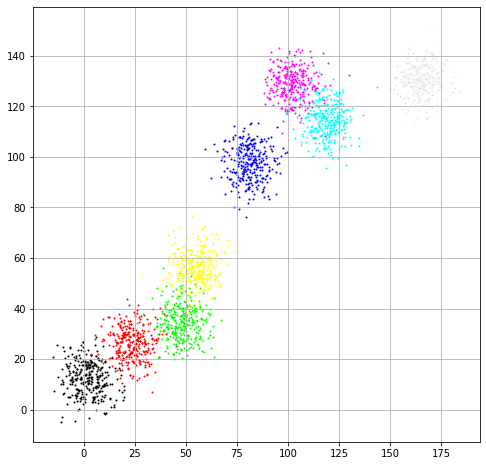

In [ ]:
#color = ["red", "blue", "green", "orange", "black"]

plt.rcParams['lines.markersize'] = 1
plt.figure(figsize=(8, 8))

for i in range(x.shape[0]):
  #plt.scatter(x[i, 0], x[i, 1], color = color[int(i/30)])
  n = int(1+(k-1)**(1/3))
  r = int(i/m)%(n)/(n-1)
  g = int(int(i/m)/n)%n/(n-1)
  b = int(int(i/m)/(n**2))/(n-1)
  if (r,g,b) == (1,1,1):
    r = r*(i-m/k)/x.shape[0]
    g = g*(i-m/k)/x.shape[0]
    b = b*(i-m/k)/x.shape[0]
  plt.scatter(x[i, 0], x[i, 1], color = (r,g,b))
 
plt.grid(True)

plt.show()

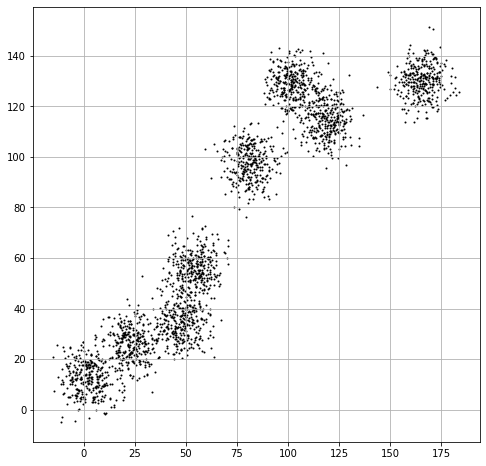

In [ ]:
plt.rcParams['lines.markersize'] = 1
plt.figure(figsize=(8, 8))

for i in range(x.shape[0]):
  plt.scatter(x[i, 0], x[i, 1], color = "k")

plt.grid(True)

plt.show()

##### <font color = green>**4.2.** </font>k-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# 2. で作成したリストと同じ

color = ["red", "blue", "green", "orange", "aqua", "purple", "grey", "black"]

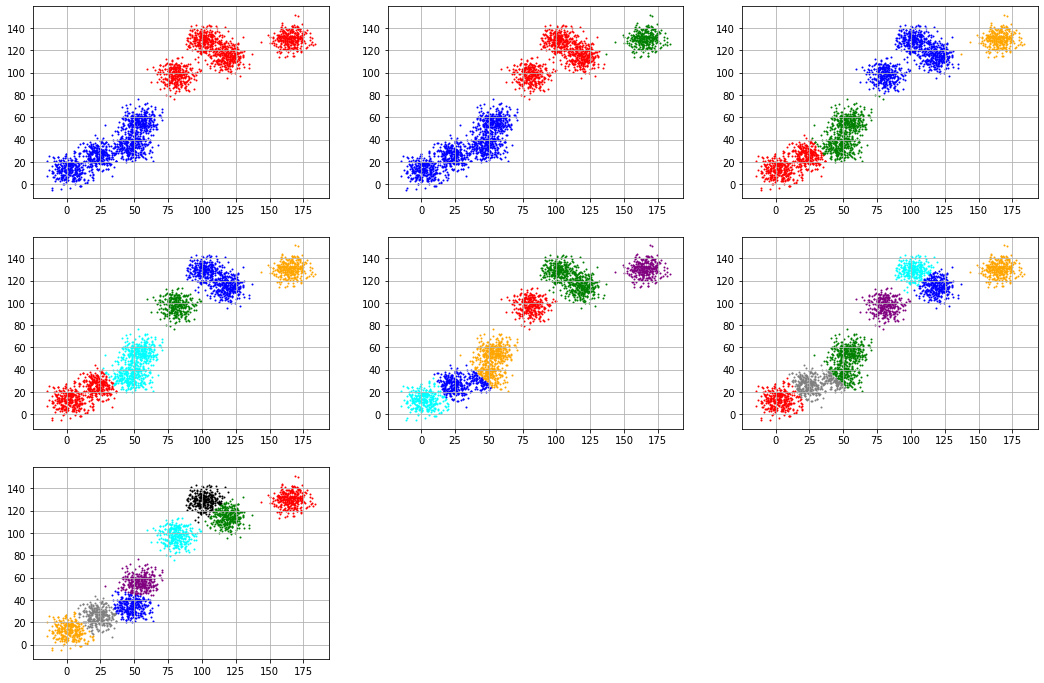

In [ ]:
km_list = [KMeans(i) for i in range(2,k+1)]

plt.figure(figsize=(18, 12))
plt.rcParams['lines.markersize'] = 1

for i in range(len(km_list)):
  km_list[i].fit_transform(x)
  plt.subplot(3,3,i+1)
  for ii in range(x.shape[0]):
    plt.scatter(x[ii,0], x[ii,1], c=color[int(km_list[i].labels_[ii])])
    plt.grid(True)

plt.show()

In [ ]:
'''
km_list = [KMeans(i) for i in range(2,k+1)]

for i in range(len(km_list)):
  km_list[i].fit_transform(x)
  plt.rcParams['lines.markersize'] = 2
  plt.figure(figsize=(10, 10))
  for ii in range(x.shape[0]):
    plt.scatter(x[ii,0], x[ii,1], c=color[int(km_list[i].labels_[ii])])
  plt.show()
'''

##### <font color = green>**4.3.** </font>クラスター評価

In [ ]:
## 今回のpdfテキストではどういう結論にしたのか？？

#### <font color = blue>**5.** </font>k平均法を自作して途中経過を可視化する

https://www.medi-08-data-06.work/entry/kmeans


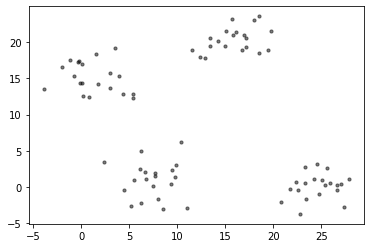

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#データの生成
np.random.seed(123)
x1 = np.r_[np.random.normal(size=20,loc=1,scale=2),
           np.random.normal(size=20,loc=8,scale=2),
           np.random.normal(size=20,loc=15,scale=2),
           np.random.normal(size=20,loc=25,scale=2)]
x2 = np.r_[np.random.normal(size=20,loc=15,scale=2),
           np.random.normal(size=20,loc=1,scale=2),
           np.random.normal(size=20,loc=20,scale=2),
           np.random.normal(size=20,loc=0,scale=2)]
X = np.c_[x1, x2]

#可視化
plt.scatter(X[:,0], X[:,1], c="black", s=10, alpha=0.5)
plt.show()

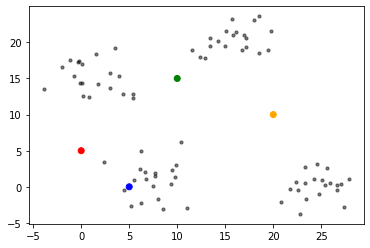

In [ ]:
centers = np.array([[0,5],[5,0],[10,15],[20,10]])

color = ["red", "blue", "green", "orange", "aqua", "purple", "grey", "black"]

plt.scatter(X[:,0], X[:,1], c="black", s=10, alpha=0.5)
plt.scatter(centers[:,0],centers[:,1],color=color[0:4])
plt.show()

In [ ]:
#Xのサンプル数だけ空のラベルを作る
idx = np.zeros(X.shape[0])

#距離の二乗が一番近い中心点のインデックスを返す。
for i in range(X.shape[0]):
  idx[i] = np.argmin(np.sum((X[i,:] - centers)**2,axis=1))

# np.sum に axis=1 をつけることで、行方向に足し算を行って、np.argmin で一番小さい値となるインデックスを返します

In [ ]:
print(idx)

[2. 2. 2. 0. 0. 2. 0. 0. 2. 0. 2. 0. 2. 2. 0. 2. 2. 2. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 3. 2.
 2. 3. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3.]


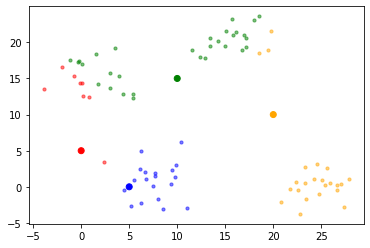

In [ ]:
for i in range(X.shape[0]):
  plt.scatter(X[i,0], X[i,1], c=color[int(idx[i])], s=10, alpha=0.5)
plt.scatter(centers[:,0],centers[:,1],color=color[0:4])
plt.show()

In [ ]:
# それぞれのグループの平均値をとったところを次の中心点の移動先とする
# 例えば、黄色グループの中心座標はここ
# X[idx==3,:].mean(axis=0)

In [ ]:
#中心の移動
for k in range(k):
  centers[k,:] = X[idx==k,:].mean(axis=0)

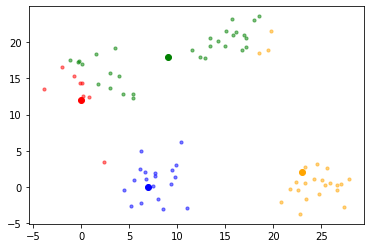

In [ ]:
for i in range(X.shape[0]):
  plt.scatter(X[i,0], X[i,1], c=color[int(idx[i])], s=10, alpha=0.5)
for i in range(len(centers)):
  plt.scatter(centers[i][0], centers[i][1], c=color[i])
plt.show()

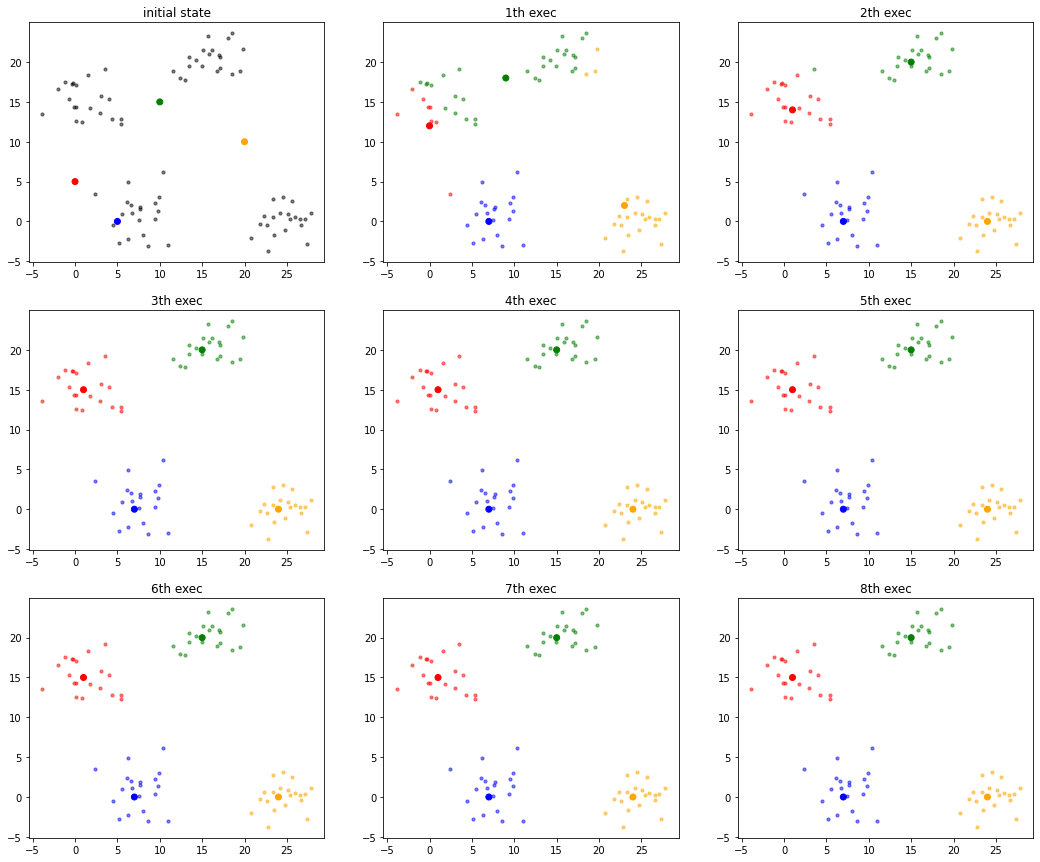

In [ ]:
idx = np.zeros(X.shape[0])
centers = np.array([[0,5],[5,0],[10,15],[20,10]])

plt.figure(figsize=(18, 15))
plt.subplot(3, 3, 1)

plt.scatter(X[:,0], X[:,1], c="black", s=10, alpha=0.5)
plt.title("initial state")
plt.scatter(centers[:,0],centers[:,1],color=color[0:4])

for j in np.arange(1,9):
  for i in range(X.shape[0]):
    idx[i] = np.argmin(np.sum((X[i,:] - centers)**2,axis=1))
        
  for k in range(len(centers)):
    centers[k,:] = X[idx==k,:].mean(axis=0)
        
  plt.subplot(3, 3, j+1)
  for l in range(len(centers)):
    plt.scatter(X[idx==l,0],X[idx==l,1],color=color[l],s=10,alpha=0.5)

  plt.title("{}th exec".format(j))
  plt.scatter(centers[:,0],centers[:,1],color=color[0:4])

plt.show()

In [ ]:
# 関数化

def kmeans(X,K,centers,iter):
  # Xのサンプル数だけ空のラベルを作る
  idx = np.zeros(X.shape[0])
  for _ in range(iter):
    # 距離の二乗が一番近い中心点のインデックスを返す
    for i in range(X.shape[0]):
      idx[i] = np.argmin(np.sum((X[i,:] - centers)**2,axis=1))
    # 中心の移動
    for k in range(K):
      centers[k,:] = X[idx==k,:].mean(axis=0)
        
    return idx

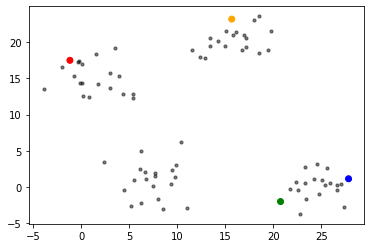

In [ ]:
# 距離の２乗を保存するサンプル数　×　グループ数の行列をつくる
n = X.shape[0]
distance = np.zeros(n*K).reshape(n,K)

# 中心点の座標を保存するための入れ物
centers = np.zeros(2*K).reshape(K,-1)

# 最初の確率は均等
pr = np.repeat(1/n,n)
# 1つ目の中心点はランダムに選ばれる
centers[0,:] = X[np.random.choice(np.arange(n),1,p=pr),]
distance[:,0] = np.sum((X-centers[0,:])**2,axis=1)

# 1つ目の中心点からの距離によって確率を変更
pr = np.sum(distance,axis=1)/np.sum(distance)
# 確率に従って2つ目の点を選ぶ
centers[1,:] = X[np.random.choice(np.arange(n),1,p=pr),]
distance[:,1] = np.sum((X-centers[1,:])**2,axis=1)

# 以下同様
pr = np.sum(distance,axis=1)/np.sum(distance)
centers[2,:] = X[np.random.choice(np.arange(n),1,p=pr),]
distance[:,2] = np.sum((X-centers[2,:])**2,axis=1)

pr = np.sum(distance,axis=1)/np.sum(distance)
centers[3,:] = X[np.random.choice(np.arange(n),1,p=pr),]
distance[:,3] = np.sum((X-centers[3,:])**2,axis=1)


# 可視化
plt.scatter(X[:,0],X[:,1],c="black",s=10,alpha=0.5)
plt.scatter(centers[:,0],centers[:,1],color=["r","b","g","orange"])


In [ ]:
# エルボー法
# エルボー法とはその名の通り肘です
# k-meansはグループの中心点からの距離が最小になるようにクラスタリングされていきます
# ということは、そのグループ中心からの距離の合計を、全てのグループで足し合わせた値が小さければ、よいクラスタリングができたと言えそうです
# これをクラスタ内誤差平方和（SSE）と呼びます
# しかし、小さければ良いというものでもなく、例えばクラスの数がサンプル数分だけあればSSEは0になります
# そこで、クラスの数を増やしていった時にこのSSEがガクっと下がったところ（肘）を最適なクラス数としようというのがエルボー法になります

def kmeansplus(X,K,inter):
  n = X.shape[0]
  distance = np.zeros(n*K).reshape(n,K)
  centers = np.zeros(X.shape[1]*K).reshape(K,-1)

  # 最初の確率は均等
  pr = np.repeat(1/n,n)
  # 1つ目の中心点はランダムに選ぶ
  centers[0,:] = X[np.random.choice(np.arange(n),1,p=pr),]
  distance[:,0] = np.sum((X-centers[0,:])**2,axis=1)
    
  for k in np.arange(1,K):
    pr = np.sum(distance,axis=1)/np.sum(distance)
    centers[k,:] = X[np.random.choice(np.arange(n),1,p=pr),]
    distance[:,k] = np.sum((X-centers[k,:])**2,axis=1)
    
  idx = kmeans(X,K,centers,inter)
    
  return idx

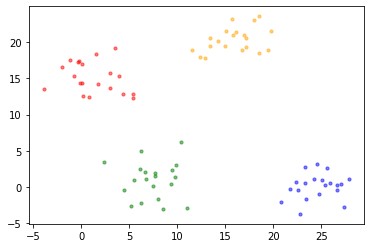

In [ ]:
idx = kmeansplus(X,K,10)

plt.scatter(x1[idx==0],x2[idx==0],color="r",s=10,alpha=0.5)
plt.scatter(x1[idx==1],x2[idx==1],color="b",s=10,alpha=0.5)
plt.scatter(x1[idx==2],x2[idx==2],color="g",s=10,alpha=0.5)
plt.scatter(x1[idx==3],x2[idx==3],color="orange",s=10,alpha=0.5)
plt.show()

In [ ]:
def kmeans(X,K,centers,iter):
  idx = np.zeros(X.shape[0])
  # クラスごとのsseを格納するための入れ物
  sse = np.zeros(K)
  for _ in range(iter):
    for i in range(X.shape[0]):
      idx[i] = np.argmin(np.sum((X[i,:] - centers)**2,axis=1))
       
    for k in range(K):
      centers[k,:] = X[idx==k,:].mean(axis=0)
      sse[k] = np.sum((X[idx==k,:]-centers[k,:])**2)  # sseの計算
  sse_sum = np.sum(sse)   # 全てのクラスで合計する
  return idx,sse_sum

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


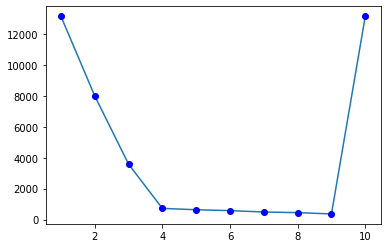

In [ ]:
# クラスの数を1から10まで変化させた時にsseがどのようになるかをみます

K = 10
sse_vec = np.zeros(K)
for k in range(K):
  idx , sse = kmeansplus(X,k+1,10)
  sse_vec[k] = sse

plt.plot(np.arange(1,11),sse_vec)
plt.plot(np.arange(1,11),sse_vec,"bo")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans_mod = KMeans(n_clusters=4,   # クラスター数
                    init='k-means++',    # 中心の設定
                    n_init=10,           # 異なる初期値を用いたk-meansの実行回数 
                    max_iter=10,        # 最大イテレーション回数  default: '300'
                    tol=1e-04,           # 収束と判定するための相対的な許容誤差 default: '1e-04'
                    random_state=0)

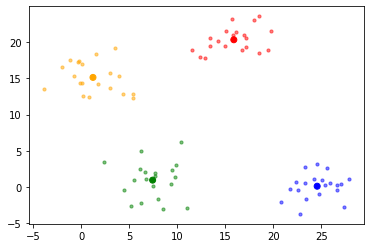

In [ ]:
idx = kmeans_mod.fit_predict(X)

#可視化
plt.scatter(X[idx==0,0],X[idx==0,1],color="r",s=10,alpha=0.5)
plt.scatter(X[idx==1,0],X[idx==1,1],color="b",s=10,alpha=0.5)
plt.scatter(X[idx==2,0],X[idx==2,1],color="g",s=10,alpha=0.5)
plt.scatter(X[idx==3,0],X[idx==3,1],color="orange",s=10,alpha=0.5)
plt.scatter(kmeans_mod.cluster_centers_[:,0],kmeans_mod.cluster_centers_[:,1],color=["r","b","g","orange"])
plt.show()

In [ ]:
kmeans_mod.inertia_

722.0352358740058

k-means自作
https://qiita.com/g-k/items/0d5d22a12a4507ecbf11

https://masamunetogetoge.com/make-k-means-by-python

https://watlab-blog.com/2020/01/19/k-means/

https://dev.classmethod.jp/articles/k-means-impl/

